In [20]:
import requests
import pandas as pd
import yaml
import duckdb

In [57]:
DB_PATH = 'weather.duckdb'
TABLE_NAME = 'observations'

con = duckdb.connect(DB_PATH)

In [58]:
df = con.sql("select date AT TIME ZONE 'UTC' AT TIME ZONE 'America/Chicago' AS cst_time, dailyrainin from observations").df()
df

,cst_time,dailyrainin
0,2025-07-13 09:42:00,4.067
1,2025-07-13 09:45:00,4.067
2,2025-07-13 09:46:00,4.067
3,2025-07-13 16:00:00,4.378
4,2025-07-13 16:00:00,4.378
...,...,...
198,2025-07-13 20:06:00,4.378
199,2025-07-13 20:07:00,4.378
200,2025-07-13 20:08:00,4.378
201,2025-07-13 16:28:00,4.378


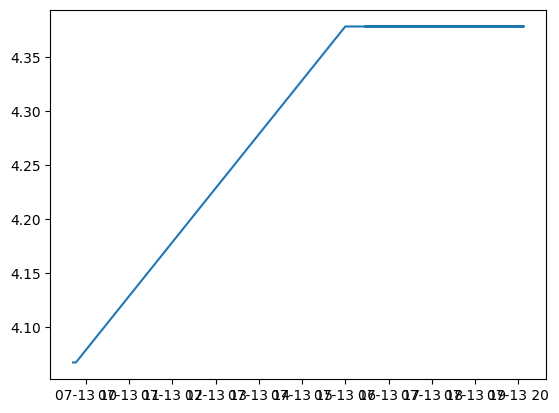

In [63]:
import matplotlib.pyplot as plt
con.close()
plt.plot(df['cst_time'], df['dailyrainin'])

In [56]:
df.groupby

<bound method DataFrame.groupby of                cst_time  dailyrainin
0   2025-07-13 09:42:00        4.067
1   2025-07-13 09:45:00        4.067
2   2025-07-13 09:46:00        4.067
3   2025-07-13 16:00:00        4.378
4   2025-07-13 16:00:00        4.378
..                  ...          ...
198 2025-07-13 20:06:00        4.378
199 2025-07-13 20:07:00        4.378
200 2025-07-13 20:08:00        4.378
201 2025-07-13 16:28:00        4.378
202 2025-07-13 16:28:00        4.378

[203 rows x 2 columns]>

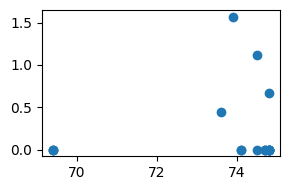

In [13]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from io import BytesIO

def plot_to_bw_pil():
	buf = BytesIO()
	width_px, height_px = 300, 200
	dpi = 100
	fig = plt.figure(figsize=(width_px / dpi, height_px / dpi), dpi=dpi)

	plt.scatter(df['tempf'], df['windspeedmph'])
	plt.tight_layout()
	plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
	buf.seek(0)
	img = Image.open(buf).convert("L")  # grayscale
	bw = img.point(lambda x: 0 if x < 128 else 255, '1')  # threshold to B/W
	return bw

# Create base image
W, H = (800, 480)
image = Image.new("1", (W, H), 255)
draw = ImageDraw.Draw(image)

# Create plot image
plot_img = plot_to_bw_pil()
plot_img = plot_img.resize((300, 200))

# Paste bottom right
image.paste(plot_img, (W - plot_img.width, H - plot_img.height))

image.show()
